In [1197]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Environment setup

### Library preparation

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [4]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df
from JJ_data_processing import xy_by_id,extract_Isw_R0_by_id

from JJformulas import *
from meas_util import *
from JJcalc import JJpar

from JJmeasurement import *

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# Sample discription

In [5]:
jj = JJmeas(sample = 'D085N1')
jj.db_connect()

# Meas

## 1b full scan

V 9ab
I 8b 11b

<IPython.core.display.Javascript object>


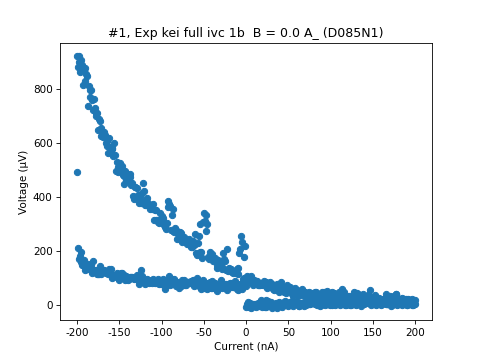

In [15]:
jj.pbi(1)

id 1 - wrong polarity? switch and remeas. but I still observe -.25 V offset??

<IPython.core.display.Javascript object>


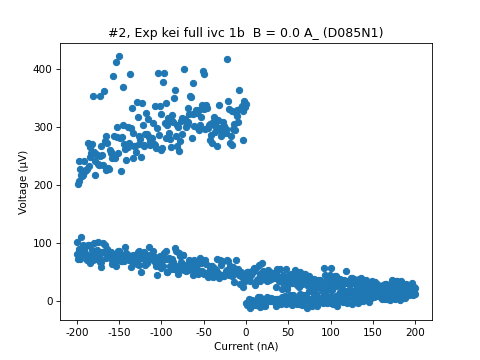

In [22]:
jj.pbi(2)

step back and first check contacts

9a-9b 3.2M
8b-11b >60M
11b - 8a > 60M, 11b is dead
8a 12a  540k

ok, go to segment d

## Seg 1d full

V 9ab
I 8a 12 a

<IPython.core.display.Javascript object>


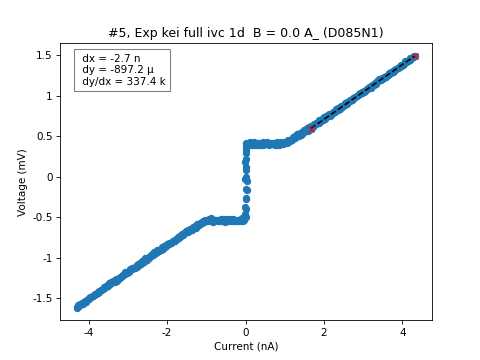

In [121]:
jj.pbi(5, interactive = True)

Rn = 324.2k-331.3k
Ej ~ 21 mK

In [29]:
7/324.2

0.0215916101172116

<IPython.core.display.Javascript object>


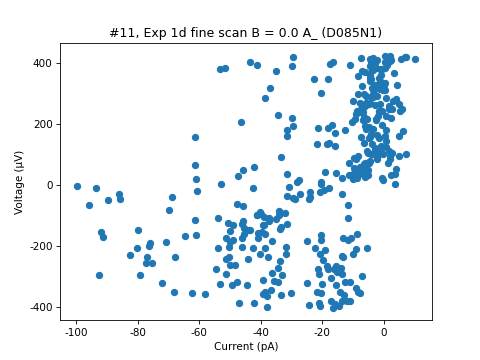

In [52]:
jj.pbi(11)

## Seg 1e full

V 9ab
I 7b 12a

<IPython.core.display.Javascript object>


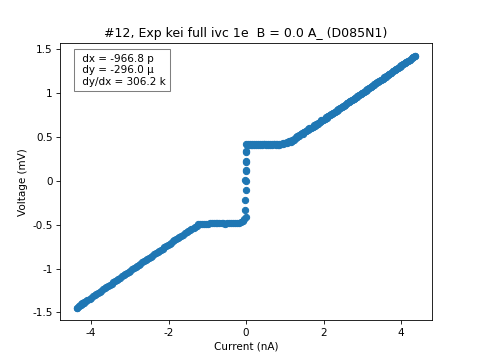

In [120]:
jj.pbi(12, interactive = True)

<IPython.core.display.Javascript object>


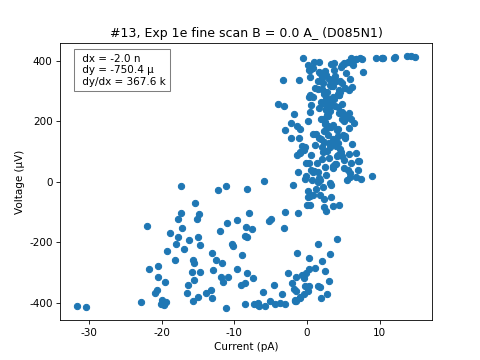

In [61]:
jj.pbi(13, interactive = True)

Rn = 308k
Ej ~ 23 mK

In [55]:
7/308

0.022727272727272728

repeat with Navg = 10

<IPython.core.display.Javascript object>


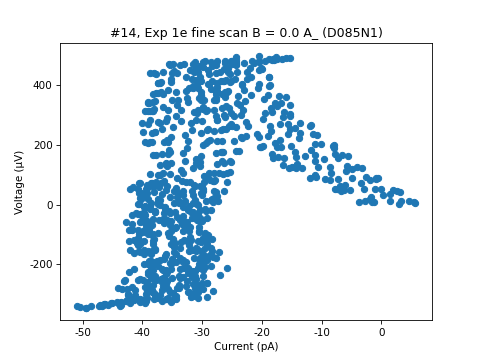

In [62]:
jj.pbi(14)

<IPython.core.display.Javascript object>


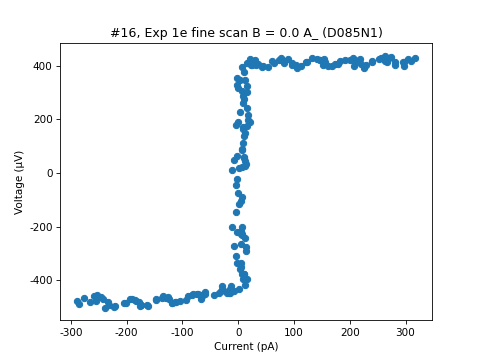

In [65]:
jj.pbi(16)

<IPython.core.display.Javascript object>


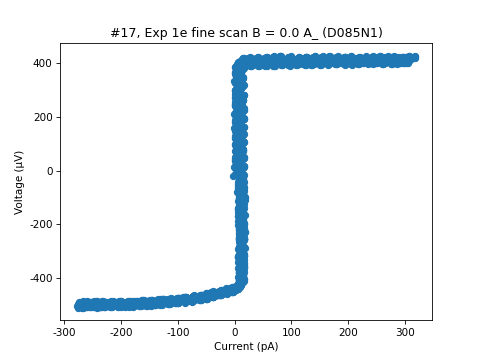

In [67]:
jj.pbi(17)

<IPython.core.display.Javascript object>


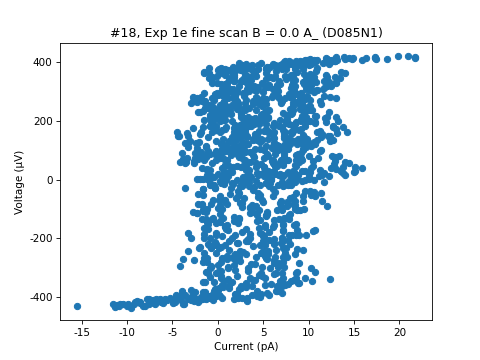

In [70]:
jj.pbi(18)

<IPython.core.display.Javascript object>


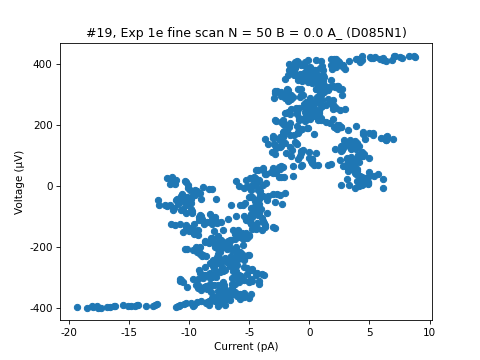

In [71]:
jj.pbi(19)

there's something like critical current with Navg = 50. 

let's try even higher Navg, 200

<IPython.core.display.Javascript object>


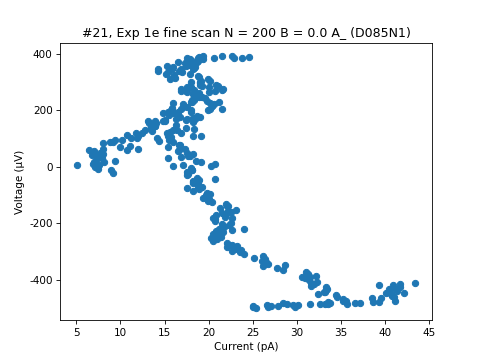

In [72]:
jj.pbi(21)

doesn't wokr, mb V drift

## seg 1f full

<IPython.core.display.Javascript object>


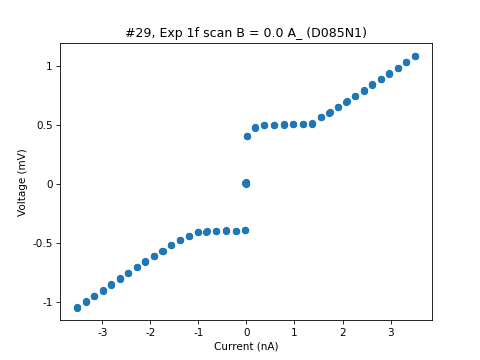

In [119]:
jj.pbi(29, interactive = True)

## Review Rn

<IPython.core.display.Javascript object>


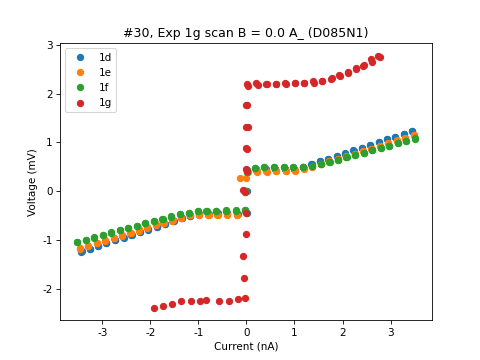

In [91]:
jj.bpbi([27,28,29,30],labels=['1d','1e','1f','1g'])

<IPython.core.display.Javascript object>


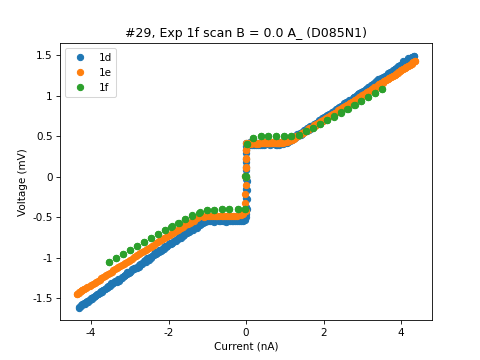

In [117]:
jj.bpbi([5,12,29],labels=['1d','1e','1f','1g'])

## Isw for 1d?

<IPython.core.display.Javascript object>


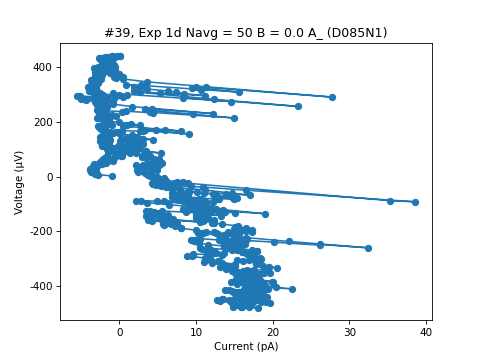

In [126]:
jj.pbi(39, ls = '-')

## ?

<IPython.core.display.Javascript object>


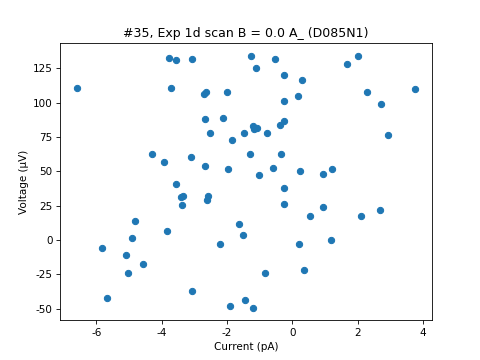

In [116]:
jj.pbi(35)

WS: double checking the biasing ascheme scheme...

In [ ]:
# voltage leads:
# 9b                   9a

# current leads:
# 9b 8b 11b 8a 12a 7b 12b 7a
#   5  1   1  1   1  1   4   (number of SQUIDs in bewteen adjacent leads)
#  !a !b  !c  d   e  f   g     (dev label followed from Plamen's convention)

# Current state

segment 1d 
V 9ab
I 8a,12a

11b is broken

Measure Rn for all segments 